# Analyzing Youth Unemployment in The IT Sector
### Author: Lindah Kelida

### Table of Content:


In [42]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [43]:
# a function to read any csv file.
def read_csv_file(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe



In [44]:
#call the function to read the cvs files
kenya = read_csv_file("Datasets/pop_kenya.csv")
rwanda = read_csv_file("Datasets/pop_rwa.csv")
edu_kenya = read_csv_file("Datasets/education_kenya.csv")
edu_rwanda = read_csv_file("Datasets/education_rwa.csv")

In [45]:
kenya.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               40 non-null     object 
 1   age_group                          40 non-null     object 
 2   sex                                40 non-null     object 
 3   year                               40 non-null     int64  
 4   population                         40 non-null     float64
 5   ILO_inactive_share                 40 non-null     float64
 6   total_inactive_population          40 non-null     float64
 7   ILO_unemployed_rate                40 non-null     float64
 8   total_unemployed_population        40 non-null     float64
 9   total_employed_population          40 non-null     float64
 10  Agriculture                        40 non-null     float64
 11  Mining and quarrying               40 non-null     float64
 

In [46]:
def analyze_dataframe(dataframe):
    # Info about the DataFrame
    print("Info:")
    print(dataframe.info())
    print("\n")

    # Description of the DataFrame
    print("Description:")
    print(dataframe.describe())
    print("\n")

    # Check for missing values
    print("Missing Values:")
    print(dataframe.isnull().sum())
    print("\n")

    # Check for duplicates
    duplicates = dataframe.duplicated()
    print("Duplicates:")
    print(duplicates.sum())
    print("\n")

    # Size of the DataFrame
    print("Size:")
    print(dataframe.size)
    print("\n")

    # Shape of the DataFrame
    print("Shape:")
    print(dataframe.shape)
    print("\n")

    # Length of the DataFrame
    print("Length:")
    print(len(dataframe))
    print("\n")
# Call the function to analyze the DataFrame
analyze_dataframe(edu_kenya)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           40 non-null     object 
 1   age_group                      40 non-null     object 
 2   sex                            40 non-null     object 
 3   year                           40 non-null     int64  
 4   population                     40 non-null     float64
 5   total_inactive_population      40 non-null     float64
 6   total_unemployed_population    40 non-null     float64
 7   total_employed_population      40 non-null     float64
 8   Less than basic_inactive       28 non-null     float64
 9   Basic_inactive                 28 non-null     float64
 10  Intermediate_inactive          28 non-null     float64
 11  Advanced_inactive              28 non-null     float64
 12  Level not stated_inactive      28 non-null    

In [47]:
# merge the three dataframes of the populations of kenya, rwanda, and ghana


# Then concatenate the data frames
pop_df = pd.concat([kenya, rwanda], ignore_index=True)
pop_df.head()
# Now, 'merged_df' contains the rows from all three data frames with a 'source' column


,name,age_group,sex,year,population,ILO_inactive_share,total_inactive_population,ILO_unemployed_rate,total_unemployed_population,total_employed_population,...,Real estate,Professional,Administrative and support,Public administration and defence,Education,Human health,Arts $ entertainment,Other services,Activities of households,Extraterritorial organizations
0,Kenya,15-24,female,2015,4742700.0,55.928,2.652497e+06,7.339,153399.979382,1.936803e+06,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
1,Kenya,15-24,female,2016,4887980.0,56.361,2.754914e+06,7.371,157228.264801,1.975837e+06,...,485418.609963,848269.122880,2.300956e+06,3.555035e+06,1.231482e+07,3.942594e+06,0,0,9.490859e+06,0
2,Kenya,15-24,female,2017,5033260.0,56.906,2.864227e+06,9.304,201806.836312,1.967226e+06,...,473589.250578,827597.314871,2.244883e+06,3.570008e+06,1.241247e+07,3.957306e+06,0,0,9.601153e+06,0
3,Kenya,15-24,female,2018,5178540.0,57.463,2.975744e+06,11.192,246536.879053,1.956259e+06,...,490568.613533,857268.755201,2.325368e+06,3.617842e+06,1.249134e+07,3.990789e+06,0,0,9.598457e+06,0
4,Kenya,15-24,female,2019,5323820.0,58.043,3.090105e+06,13.175,294291.971987,1.939423e+06,...,5175.457976,9044.113900,2.453244e+04,3.655088e+04,1.292827e+05,4.011513e+04,0,0,9.543569e+04,0


In [48]:
# Shuffle the rows of the DataFrame
pop_df_shuffled = pop_df.sample(frac=1, random_state=42)
pop_df_shuffled
# The 'frac=1' argument means you want to sample the entire DataFrame
# 'random_state' is set for reproducibility; you can omit it if not needed

# Now, 'shuffled_df' contains the rows of 'merged_df' shuffled randomly


,name,age_group,sex,year,population,ILO_inactive_share,total_inactive_population,ILO_unemployed_rate,total_unemployed_population,total_employed_population,...,Real estate,Professional,Administrative and support,Public administration and defence,Education,Human health,Arts $ entertainment,Other services,Activities of households,Extraterritorial organizations
30,Kenya,25-35,male,2015,4085025.920,6.567,2.682637e+05,1.354,51678.961106,3.765083e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
0,Kenya,15-24,female,2015,4742700.000,55.928,2.652497e+06,7.339,153399.979382,1.936803e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
22,Kenya,25-35,female,2017,4284168.384,13.838,5.928432e+05,2.300,84900.478750,3.606425e+06,...,9.154369e+05,1.599726e+06,4.339306e+06,6.900742e+06,2.399301e+07,7.649380e+06,0,0,1.855880e+07,0
31,Kenya,25-35,male,2016,4166646.272,6.499,2.707903e+05,1.347,52477.179388,3.843379e+06,...,1.327447e+06,3.381440e+06,1.229659e+07,1.172130e+07,2.180174e+07,4.970727e+06,0,0,8.665562e+06,0
18,Kenya,15-24,male,2023,5924360.000,57.228,3.390393e+06,12.417,314642.714575,2.219325e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Kenya,25-35,female,2015,4122072.640,14.453,5.957632e+05,1.793,63226.729000,3.463083e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
60,Rwanda,25-35,female,2015,1096585.600,39.392,4.319670e+05,10.817,71891.794010,5.927268e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
71,Rwanda,25-35,male,2016,1038388.800,21.554,2.238143e+05,9.831,80080.816937,7.344937e+05,...,9.429977e+04,5.353002e+05,1.217279e+06,1.162253e+06,1.567295e+06,5.906062e+05,0,0,2.948138e+06,0
14,Kenya,15-24,male,2019,5358200.000,57.540,3.083108e+06,11.675,265616.958310,2.009475e+06,...,7.106145e+03,1.810167e+04,6.582663e+04,5.916029e+04,1.124445e+05,2.429234e+04,0,0,4.283341e+04,0


In [49]:
pop_df_shuffled.head()

,name,age_group,sex,year,population,ILO_inactive_share,total_inactive_population,ILO_unemployed_rate,total_unemployed_population,total_employed_population,...,Real estate,Professional,Administrative and support,Public administration and defence,Education,Human health,Arts $ entertainment,Other services,Activities of households,Extraterritorial organizations
30,Kenya,25-35,male,2015,4085025.920,6.567,2.682637e+05,1.354,51678.961106,3.765083e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
0,Kenya,15-24,female,2015,4742700.000,55.928,2.652497e+06,7.339,153399.979382,1.936803e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
22,Kenya,25-35,female,2017,4284168.384,13.838,5.928432e+05,2.300,84900.478750,3.606425e+06,...,9.154369e+05,1.599726e+06,4.339306e+06,6.900742e+06,2.399301e+07,7.649380e+06,0,0,1.855880e+07,0
31,Kenya,25-35,male,2016,4166646.272,6.499,2.707903e+05,1.347,52477.179388,3.843379e+06,...,1.327447e+06,3.381440e+06,1.229659e+07,1.172130e+07,2.180174e+07,4.970727e+06,0,0,8.665562e+06,0
18,Kenya,15-24,male,2023,5924360.000,57.228,3.390393e+06,12.417,314642.714575,2.219325e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0


If we are going to look at the trends in our data then the year column should be in date format and not as an interger and the age and sex columns as categories which is something to note.

In [50]:
# Convert the 'year' column to datetime format
pop_df_shuffled['year'] = pd.to_datetime(pop_df['year'], format='%Y').dt.year

# Convert the 'sex' column to category
pop_df_shuffled['sex'] = pop_df_shuffled['sex'].astype('category')
pop_df_shuffled['age_group'] = pop_df_shuffled['age_group'].astype('category')

# Now, the 'year' column is of integer type, and the 'sex' column is of categorical type
pop_df_shuffled.info()
pop_df_shuffled.year.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 30 to 51
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   name                               80 non-null     object  
 1   age_group                          80 non-null     category
 2   sex                                80 non-null     category
 3   year                               80 non-null     int64   
 4   population                         80 non-null     float64 
 5   ILO_inactive_share                 80 non-null     float64 
 6   total_inactive_population          80 non-null     float64 
 7   ILO_unemployed_rate                80 non-null     float64 
 8   total_unemployed_population        80 non-null     float64 
 9   total_employed_population          80 non-null     float64 
 10  Agriculture                        80 non-null     float64 
 11  Mining and quarrying               80 non-null

array([2015, 2017, 2016, 2023, 2019, 2024, 2018, 2022, 2020, 2021],
      dtype=int64)

In [51]:
# Write the shuffled DataFrame to a CSV file
shuffled_filename = "Datasets/ken_rwa_pop.csv"
pop_df_shuffled.to_csv(shuffled_filename, index=False)

print(f"Shuffled DataFrame saved as '{shuffled_filename}'")


Shuffled DataFrame saved as 'Datasets/ken_rwa_pop.csv'


IT Employment Trends: Visualize how IT employment has evolved over the years in the "Information and Communication" industry. This can help identify growth patterns and fluctuations.


In [52]:
pop_df = pop_df_shuffled.copy()
pop_df.head()

,name,age_group,sex,year,population,ILO_inactive_share,total_inactive_population,ILO_unemployed_rate,total_unemployed_population,total_employed_population,...,Real estate,Professional,Administrative and support,Public administration and defence,Education,Human health,Arts $ entertainment,Other services,Activities of households,Extraterritorial organizations
30,Kenya,25-35,male,2015,4085025.920,6.567,2.682637e+05,1.354,51678.961106,3.765083e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
0,Kenya,15-24,female,2015,4742700.000,55.928,2.652497e+06,7.339,153399.979382,1.936803e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
22,Kenya,25-35,female,2017,4284168.384,13.838,5.928432e+05,2.300,84900.478750,3.606425e+06,...,9.154369e+05,1.599726e+06,4.339306e+06,6.900742e+06,2.399301e+07,7.649380e+06,0,0,1.855880e+07,0
31,Kenya,25-35,male,2016,4166646.272,6.499,2.707903e+05,1.347,52477.179388,3.843379e+06,...,1.327447e+06,3.381440e+06,1.229659e+07,1.172130e+07,2.180174e+07,4.970727e+06,0,0,8.665562e+06,0
18,Kenya,15-24,male,2023,5924360.000,57.228,3.390393e+06,12.417,314642.714575,2.219325e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0


Data Visualizations

Participants can create insightful data visualizations based on the IT employment datasets to reveal trends, patterns, and relationships in the IT sector. The visualizations could include a variety of chart types, such as bar charts, line graphs, scatter plots, and more. The goal is to answer key questions and provide valuable insights:

    IT Employment Trends: Visualize how IT employment has evolved over the years in the "Information and Communication" industry. This can help identify growth patterns and fluctuations.

    Age and Gender Analysis: Create scatter plots that show the distribution of IT employment based on age, while differentiating between genders. This could uncover age-related employment trends in the IT sector.

    Education and Employment: Illustrate the relationship between education levels and IT employment using bar charts. Explore whether higher education correlates with increased employment.

    Country Comparison: Employ box plots to compare IT employment across different age groups for each country (Kenya, Ghana, Rwanda). This can provide insights into country-specific employment patterns.

    Variable Correlations: Utilize a correlation heatmap to reveal potential relationships among employment variables within the IT sector. This could highlight areas of significant influence or interdependence.

By analyzing and visualizing the data in these ways, participants can gain a comprehensive understanding of IT employment trends, demographic influences, and potential recommendations for improving job opportunities in the formal IT sector.

Feel free to adjust the analysis and summary based on your specific dataset and objectives.

In [53]:
edu_kenya.head()

,name,age_group,sex,year,population,total_inactive_population,total_unemployed_population,total_employed_population,Less than basic_inactive,Basic_inactive,Intermediate_inactive,Advanced_inactive,Level not stated_inactive,Less than basic_unemployment,Basic_unemployment,Intermediate_unemployment,Advanced_unemployment,Level not stated_unemployment
0,Kenya,15-24,female,2015,4742700.0,2.652497e+06,153399.979382,1.936803e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kenya,15-24,female,2016,4887980.0,2.754914e+06,157228.264801,1.975837e+06,47.88,51.74,60.87,60.76,67.41,133251.123331,1.321644e+06,1.198570e+06,94101.818760,7347.356903
2,Kenya,15-24,female,2017,5033260.0,2.864227e+06,201806.836312,1.967226e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kenya,15-24,female,2018,5178540.0,2.975744e+06,246536.879053,1.956259e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kenya,15-24,female,2019,5323820.0,3.090105e+06,294291.971987,1.939423e+06,68.38,68.03,56.99,31.24,47.56,246619.604416,1.992582e+06,7.778941e+05,55545.273909,17461.434743


In [54]:
edu_rwanda.head()

,name,age_group,sex,year,population,total_inactive_population,total_unemployed_population,total_employed_population,Less than basic_inactive,Basic_inactive,Intermediate_inactive,Advanced_inactive,Level not stated_inactive,Less than basic_unemployment,Basic_unemployment,Intermediate_unemployment,Advanced_unemployment,Level not stated_unemployment
0,Rwanda,15-24,female,2015,1120700.0,648818.0580,84438.554701,387443.387299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rwanda,15-24,female,2016,1155980.0,673208.0726,86638.250091,396133.677309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rwanda,15-24,female,2017,1191260.0,696517.8094,88895.276807,405846.913793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rwanda,15-24,female,2018,1226540.0,781195.5914,82027.986620,363316.421980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rwanda,15-24,female,2019,1261820.0,801293.5546,83042.128635,377484.316765,49.65,57.11,71.72,73.97,NaN,14195.622187,679622.7203,92104.636741,15370.575372,NaN


In [55]:
# Then concatenate the data frames
ken_rwa_edu = pd.concat([edu_kenya, edu_rwanda], ignore_index=True)
# Now, 'merged_df' contains the rows from all three data frames with a 'source' column

# Shuffle the rows of the DataFrame
ken_rwa_edu = ken_rwa_edu.sample(frac=1, random_state=42)
ken_rwa_edu

#Convert the 'year' column to datetime format
ken_rwa_edu['year'] = pd.to_datetime(ken_rwa_edu['year'], format='%Y').dt.year

# Convert the 'sex' column to category
ken_rwa_edu['sex'] = ken_rwa_edu['sex'].astype('category')
ken_rwa_edu['age_group'] = ken_rwa_edu['age_group'].astype('category')

# Now, the 'year' column is of integer type, and the 'sex' column is of categorical type
ken_rwa_edu.info()
# Write the shuffled DataFrame to a CSV file
shuffled_filename1 = "Datasets/ken_rwa_edu.csv"
ken_rwa_edu.to_csv(shuffled_filename1, index=False)

print(f"Shuffled DataFrame saved as '{shuffled_filename1}'")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 30 to 51
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   name                           80 non-null     object  
 1   age_group                      80 non-null     category
 2   sex                            80 non-null     category
 3   year                           80 non-null     int64   
 4   population                     80 non-null     float64 
 5   total_inactive_population      80 non-null     float64 
 6   total_unemployed_population    80 non-null     float64 
 7   total_employed_population      80 non-null     float64 
 8   Less than basic_inactive       52 non-null     float64 
 9   Basic_inactive                 52 non-null     float64 
 10  Intermediate_inactive          52 non-null     float64 
 11  Advanced_inactive              52 non-null     float64 
 12  Level not stated_inactive      28 non

IT Employment Trends: Visualize how IT employment has evolved over the years in the "Information and Communication" industry. This can help identify growth patterns and fluctuations.

Most of our columns have missing values but how do we impute this missing values. Since our data is limited we will look at their distribution and see a better way of imputing the missing values 

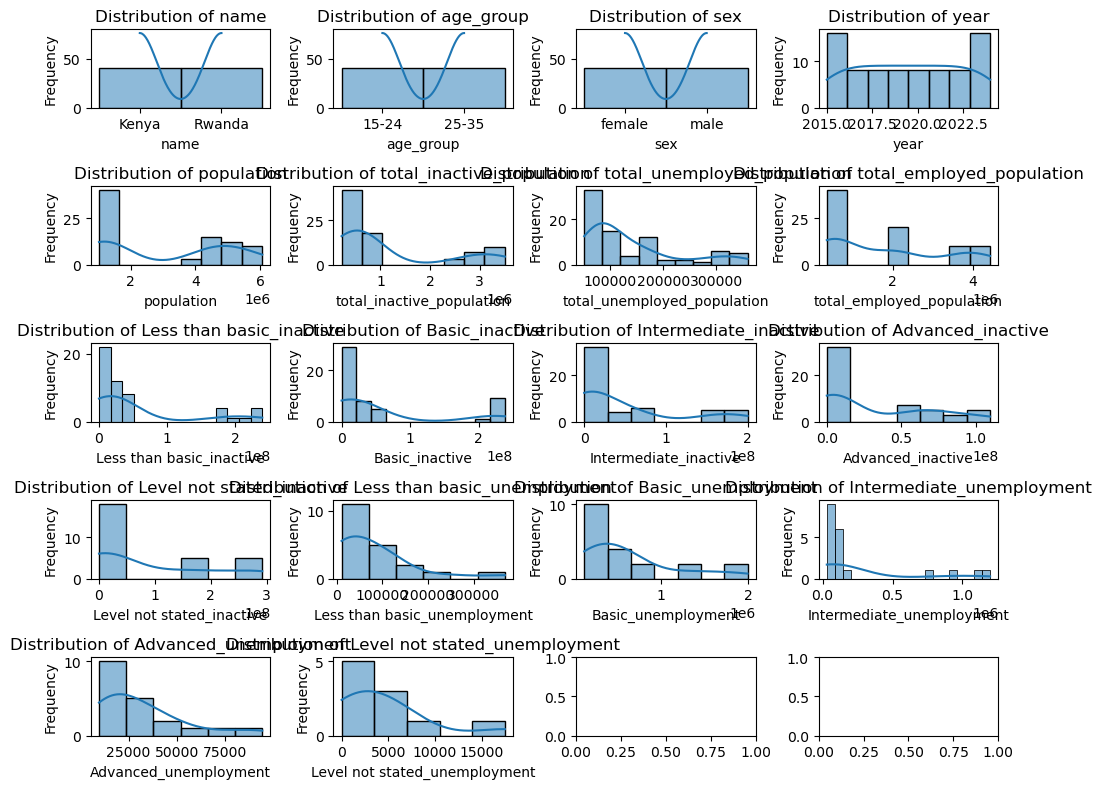

In [56]:
# Create a 2x2 grid of subplots for distribution plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 8))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Create distribution plots for each column in the subplots
for i, column in enumerate(ken_rwa_edu.columns):
    sns.histplot(ken_rwa_edu[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


when we encounter an inverted bell curve or left-skewed distribution, it suggests that a significant number of data points are relatively lower than the average, and there might be a minority of data points on the higher end.

We will use the median to impute the missing values


In [57]:
# Impute missing values with the median for each column
median_values = ken_rwa_edu.median()
ken_rwa_edu = ken_rwa_edu.fillna(median_values)

ken_rwa_edu.head()

,name,age_group,sex,year,population,total_inactive_population,total_unemployed_population,total_employed_population,Less than basic_inactive,Basic_inactive,Intermediate_inactive,Advanced_inactive,Level not stated_inactive,Less than basic_unemployment,Basic_unemployment,Intermediate_unemployment,Advanced_unemployment,Level not stated_unemployment
30,Kenya,25-35,male,2015,4085025.920,2.682637e+05,51678.961106,3.765083e+06,2.246181e+07,1.106970e+07,1.240117e+07,9.063538e+06,2.772743e+07,44474.924114,459236.418388,90382.695325,24247.657997,3118.683667
0,Kenya,15-24,female,2015,4742700.000,2.652497e+06,153399.979382,1.936803e+06,2.246181e+07,1.106970e+07,1.240117e+07,9.063538e+06,2.772743e+07,44474.924114,459236.418388,90382.695325,24247.657997,3118.683667
22,Kenya,25-35,female,2017,4284168.384,5.928432e+05,84900.478750,3.606425e+06,2.246181e+07,1.106970e+07,1.240117e+07,9.063538e+06,2.772743e+07,44474.924114,459236.418388,90382.695325,24247.657997,3118.683667
31,Kenya,25-35,male,2016,4166646.272,2.707903e+05,52477.179388,3.843379e+06,2.044000e+01,3.700000e+00,4.250000e+00,1.209000e+01,2.242000e+01,21049.100313,128057.474018,105928.998880,13881.193408,1873.540165
18,Kenya,15-24,male,2023,5924360.000,3.390393e+06,314642.714575,2.219325e+06,1.847425e+08,2.244779e+08,1.588738e+08,8.011498e+07,2.855050e+08,44474.924114,459236.418388,90382.695325,24247.657997,3118.683667


In [60]:
#Convert year column to datetime with fixed day and month
ken_rwa_edu['year'] = pd.to_datetime(ken_rwa_edu['year'], format='%Y').dt.year


In [61]:
# Convert the 'sex' column to category
ken_rwa_edu['sex'] = ken_rwa_edu['sex'].astype('category')
ken_rwa_edu['age_group'] = ken_rwa_edu['age_group'].astype('category')

# Now, the 'year' column is of integer type, and the 'sex' column is of categorical type
ken_rwa_edu.info()
# Write the shuffled DataFrame to a CSV file
shuffled_filename1 = "Datasets/ken_rwa_edu.csv"
ken_rwa_edu.to_csv(shuffled_filename1, index=False)

print(f"Shuffled DataFrame saved as '{shuffled_filename1}'")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 30 to 51
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   name                           80 non-null     object  
 1   age_group                      80 non-null     category
 2   sex                            80 non-null     category
 3   year                           80 non-null     int64   
 4   population                     80 non-null     float64 
 5   total_inactive_population      80 non-null     float64 
 6   total_unemployed_population    80 non-null     float64 
 7   total_employed_population      80 non-null     float64 
 8   Less than basic_inactive       80 non-null     float64 
 9   Basic_inactive                 80 non-null     float64 
 10  Intermediate_inactive          80 non-null     float64 
 11  Advanced_inactive              80 non-null     float64 
 12  Level not stated_inactive      80 non

In [59]:
ken_rwa_edu.year.unique()

array([2015, 2017, 2016, 2023, 2019, 2024, 2018, 2022, 2020, 2021],
      dtype=int64)